In [1]:
import pandas as pd
import nilearn as nl
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
from scipy.linalg import issymmetric
from nilearn.connectome import vec_to_sym_matrix, sym_matrix_to_vec
from nilearn import plotting
import seaborn as sns
import numpy as np
import torch
import xarray as xr
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset, Subset, TensorDataset
from PIL import Image
from scipy.linalg import issymmetric
import pingouin as pg
import plotly.express as px
import os
import re
import plotly.io as pio
from tqdm import tqdm

In [5]:
exp_name = "log transformation,  15 targets, batch size 32, no augmentations, non linear decoder, without auxiliary tasks"
#exp_name = "test on mat ae pretrained for embedding analysis with slight change in direction reg"
dataset = 'test'
root = '.'
exp_dir = f'{root}/results/{exp_name}'
predictions = pd.read_csv(f'{exp_dir}/pred_results.csv')
predictions = predictions[(predictions["dataset"] == dataset) & (predictions["train_ratio"] == 1)]

In [6]:
targets = ["benton_faces", "cattell","famous_faces",
           "hotel_time","picture_priming_baseline_acc","picture_priming_baseline_rt",
           "rt_choice","rt_simple","syn_sem_prop_error","syn_sem_rt",
           "tip_of_tongue","VSTM_colour_K_mean","VSTM_colour_K_precision","VSTM_colour_K_doubt","VSTM_colour_MSE"]
# Calculate Spearman correlation for each target
spearman_results = {}
for target in targets:
    target_column = predictions[target]
    target_pred_column = predictions[f"{target}_pred"]
    spearman_corr, _ = spearmanr(target_column, target_pred_column)
    spearman_results[target] = spearman_corr

# Display results
for target, corr in spearman_results.items():
    print(f"Spearman correlation for {target}: {corr}")

Spearman correlation for benton_faces: -0.043875477739155136
Spearman correlation for cattell: 0.4534863618681556
Spearman correlation for famous_faces: 0.16774910184431596
Spearman correlation for hotel_time: 0.2359612552225647
Spearman correlation for picture_priming_baseline_acc: 0.2341364934444284
Spearman correlation for picture_priming_baseline_rt: 0.003693225484241743
Spearman correlation for rt_choice: 0.37104567095750307
Spearman correlation for rt_simple: -0.025739980351160034
Spearman correlation for syn_sem_prop_error: -0.012966326430151198
Spearman correlation for syn_sem_rt: 0.1502333935400226
Spearman correlation for tip_of_tongue: 0.10645148336145756
Spearman correlation for VSTM_colour_K_mean: 0.225704713202509
Spearman correlation for VSTM_colour_K_precision: 0.053258432627150666
Spearman correlation for VSTM_colour_K_doubt: 0.10632037685467416
Spearman correlation for VSTM_colour_MSE: 0.29452603471295064


In [45]:
targets = ["age", "benton_faces", "cattell", "famous_faces", "hotel_time", "proverbs", "tip_of_tongue"]

# Calculate Pearson correlation for each target
pearson_results = {}
for target in targets:
    target_column = predictions[target]
    target_pred_column = predictions[f"{target}_pred"]
    
    # Calculate Pearson correlation
    pearson_corr = np.corrcoef(target_column, target_pred_column)[0, 1]
    pearson_results[target] = pearson_corr

# Display results
for target, corr in pearson_results.items():
    print(f"Pearson correlation for {target}: {corr}")

Pearson correlation for age: -0.25841361107038363
Pearson correlation for benton_faces: 0.3173521782317444
Pearson correlation for cattell: 0.134087597819453
Pearson correlation for famous_faces: -0.05191799303233838
Pearson correlation for hotel_time: 0.12392899869548962
Pearson correlation for proverbs: 0.18974777451843067
Pearson correlation for tip_of_tongue: 0.12636231419040717


In [4]:
exp_name = "log transformation,  19 targets, batch size 32, 3 augmentations, non linear decoder 2"
#exp_name = "test on mat ae pretrained for embedding analysis with slight change in direction reg"
dataset = 'test'
root = '.'
exp_dir = f'{root}/results/{exp_name}'
predictions = pd.read_csv(f'{exp_dir}/pred_results.csv')
predictions = predictions[(predictions["dataset"] == dataset) & (predictions["train_ratio"] == 1)]

In [5]:
targets = ["age","benton_faces", "cattell", "cardio_measure_pulse_mean", "cardio_measure_bp_sys_mean", 
           "cardio_measure_bp_dia_mean","famous_faces",
           "hotel_time","picture_priming_baseline_acc","picture_priming_baseline_rt",
           "rt_choice","rt_simple","syn_sem_prop_error","syn_sem_rt",
           "tip_of_tongue","VSTM_colour_K_mean","VSTM_colour_K_precision","VSTM_colour_K_doubt","VSTM_colour_MSE"]

# Calculate Spearman correlation for each target
spearman_results = {}
mean = []
for target in targets:
    target_column = predictions[target]
    target_pred_column = predictions[f"{target}_pred"]
    spearman_corr, _ = spearmanr(target_column, target_pred_column)
    mean.append(spearman_corr)
    spearman_results[target] = spearman_corr
print("mean", np.mean(mean))
# Display results
for target, corr in spearman_results.items():
    print(f"Spearman correlation for {target}: {corr}")

mean 0.2817073697675695
Spearman correlation for age: 0.7134926357708146
Spearman correlation for benton_faces: 0.14165642238748102
Spearman correlation for cattell: 0.46777591265325286
Spearman correlation for cardio_measure_pulse_mean: 0.09109807309409047
Spearman correlation for cardio_measure_bp_sys_mean: 0.41012836974879
Spearman correlation for cardio_measure_bp_dia_mean: 0.2538531567757525
Spearman correlation for famous_faces: 0.3480763554470138
Spearman correlation for hotel_time: 0.1933266996379696
Spearman correlation for picture_priming_baseline_acc: 0.3154258375813799
Spearman correlation for picture_priming_baseline_rt: 0.22164391412250242
Spearman correlation for rt_choice: 0.5205582285815049
Spearman correlation for rt_simple: 0.12849837519208002
Spearman correlation for syn_sem_prop_error: -0.0029592665686231545
Spearman correlation for syn_sem_rt: 0.36237086523243994
Spearman correlation for tip_of_tongue: 0.25446676121568096
Spearman correlation for VSTM_colour_K_mea

In [2]:
exp_name = "log transformation,  19 targets, batch size 32, 4 augmentations, non linear decoder, with auxiliary tasks"
#exp_name = "test on mat ae pretrained for embedding analysis with slight change in direction reg"
dataset = 'test'
root = '.'
exp_dir = f'{root}/results/{exp_name}'
predictions = pd.read_csv(f'{exp_dir}/pred_results.csv')
predictions = predictions[(predictions["dataset"] == dataset) & (predictions["train_ratio"] == 1)]

In [3]:
targets = ["age","benton_faces", "cattell", "cardio_measure_pulse_mean", "cardio_measure_bp_sys_mean", 
           "cardio_measure_bp_dia_mean","famous_faces",
           "hotel_time","picture_priming_baseline_acc","picture_priming_baseline_rt",
           "rt_choice","rt_simple","syn_sem_prop_error","syn_sem_rt",
           "tip_of_tongue","VSTM_colour_K_mean","VSTM_colour_K_precision","VSTM_colour_K_doubt","VSTM_colour_MSE"]

# Calculate Spearman correlation for each target
spearman_results = {}
mean = []
for target in targets:
    target_column = predictions[target]
    target_pred_column = predictions[f"{target}_pred"]
    spearman_corr, _ = spearmanr(target_column, target_pred_column)
    mean.append(spearman_corr)
    spearman_results[target] = spearman_corr
print("mean", np.mean(mean))
# Display results
for target, corr in spearman_results.items():
    print(f"Spearman correlation for {target}: {corr}")

mean 0.25598671729373373
Spearman correlation for age: 0.6538740413510764
Spearman correlation for benton_faces: 0.20208061893987353
Spearman correlation for cattell: 0.5282088045152267
Spearman correlation for cardio_measure_pulse_mean: 0.09622595223680636
Spearman correlation for cardio_measure_bp_sys_mean: 0.3715712735868398
Spearman correlation for cardio_measure_bp_dia_mean: 0.2200648606728955
Spearman correlation for famous_faces: 0.26957656495494353
Spearman correlation for hotel_time: 0.1626128907460183
Spearman correlation for picture_priming_baseline_acc: 0.4232438306666832
Spearman correlation for picture_priming_baseline_rt: 0.11933703355288634
Spearman correlation for rt_choice: 0.5425145476988186
Spearman correlation for rt_simple: 0.10817442124089982
Spearman correlation for syn_sem_prop_error: 0.03662029361921396
Spearman correlation for syn_sem_rt: -0.015426897314448814
Spearman correlation for tip_of_tongue: 0.21568933820485225
Spearman correlation for VSTM_colour_K_m

In [5]:
spearman_results

{'age': 0.7134926357708146,
 'benton_faces': 0.14165642238748102,
 'cattell': 0.46777591265325286,
 'cardio_measure_pulse_mean': 0.09109807309409047,
 'cardio_measure_bp_sys_mean': 0.41012836974879,
 'cardio_measure_bp_dia_mean': 0.2538531567757525,
 'famous_faces': 0.3480763554470138,
 'hotel_time': 0.1933266996379696,
 'picture_priming_baseline_acc': 0.3154258375813799,
 'picture_priming_baseline_rt': 0.22164391412250242,
 'rt_choice': 0.5205582285815049,
 'rt_simple': 0.12849837519208002,
 'syn_sem_prop_error': -0.0029592665686231545,
 'syn_sem_rt': 0.36237086523243994,
 'tip_of_tongue': 0.25446676121568096,
 'VSTM_colour_K_mean': 0.30407839383328716,
 'VSTM_colour_K_precision': 0.1938534398065345,
 'VSTM_colour_K_doubt': 0.10153412096631988,
 'VSTM_colour_MSE': 0.33356173010554957}

In [60]:
exp_name = "log transformation,  15 targets, batch size 32, 3 augmentations, non linear decoder, without auxiliary tasks"
#exp_name = "test on mat ae pretrained for embedding analysis with slight change in direction reg"
dataset = 'test'
root = '.'
exp_dir = f'{root}/results/{exp_name}'
predictions = pd.read_csv(f'{exp_dir}/pred_results.csv')
predictions = predictions[(predictions["dataset"] == dataset) & (predictions["train_ratio"] == 1)]

In [61]:
targets = ["benton_faces", "cattell","famous_faces",
           "hotel_time","picture_priming_baseline_acc","picture_priming_baseline_rt",
           "rt_choice","rt_simple","syn_sem_prop_error","syn_sem_rt",
           "tip_of_tongue","VSTM_colour_K_mean","VSTM_colour_K_precision","VSTM_colour_K_doubt","VSTM_colour_MSE"]

# Calculate Spearman correlation for each target
spearman_results = {}
for target in targets:
    target_column = predictions[target]
    target_pred_column = predictions[f"{target}_pred"]
    spearman_corr, _ = spearmanr(target_column, target_pred_column)
    spearman_results[target] = spearman_corr

# Display results
for target, corr in spearman_results.items():
    print(f"Spearman correlation for {target}: {corr}")

Spearman correlation for benton_faces: 0.21047202033071863
Spearman correlation for cattell: 0.5188741756478432
Spearman correlation for famous_faces: 0.24863823602382185
Spearman correlation for hotel_time: 0.14115957738284104
Spearman correlation for picture_priming_baseline_acc: 0.2676903963126134
Spearman correlation for picture_priming_baseline_rt: -0.12248106179595161
Spearman correlation for rt_choice: 0.34575408721062045
Spearman correlation for rt_simple: 0.021064564072851854
Spearman correlation for syn_sem_prop_error: 0.041006259402352196
Spearman correlation for syn_sem_rt: 0.08227846506932188
Spearman correlation for tip_of_tongue: 0.2139963530006373
Spearman correlation for VSTM_colour_K_mean: 0.2662115525102653
Spearman correlation for VSTM_colour_K_precision: 0.23178073909867244
Spearman correlation for VSTM_colour_K_doubt: 0.06408040909892435
Spearman correlation for VSTM_colour_MSE: 0.3033932035166385


In [73]:
targets = ["age"]

# Calculate Pearson correlation for each target
pearson_results = {}
for target in targets:
    target_column = predictions[target]
    target_pred_column = predictions[f"{target}_pred"]
    
    # Calculate Pearson correlation
    pearson_corr = np.corrcoef(target_column, target_pred_column)[0, 1]
    pearson_results[target] = pearson_corr

# Display results
for target, corr in pearson_results.items():
    print(f"Pearson correlation for {target}: {corr}")

Pearson correlation for age: -0.7691432766787062


In [35]:
y_pred = np.load("results/multivariate prediction with normalized targets, embedding space of dim 50 4/recon_mat/y_pred_run0.npy")

In [37]:
y = np.load("/data/parietal/store2/work/mrenaudi/contrastive-reg-3/results/multivariate prediction with normalized targets, embedding space of dim 50 4/recon_mat/y_run0.npy")

In [38]:
y

array([[6.7000000e+01, 2.0000000e+01, 5.1000000e+01, ..., 4.6088639e-01,
        2.9173210e+01, 2.6564536e+03],
       [4.8000000e+01, 2.3000000e+01, 6.5500000e+01, ..., 5.0114036e-01,
        4.7196419e+01, 2.3765327e+03],
       [3.4000000e+01, 2.4000000e+01, 7.4500000e+01, ..., 5.2675152e-01,
        2.3080339e+01, 1.6786951e+03],
       ...,
       [6.9000000e+01, 1.9000000e+01, 5.6500004e+01, ..., 3.9355046e-01,
        2.1703560e+01, 2.4799407e+03],
       [6.7000000e+01, 2.3000000e+01, 6.9500000e+01, ..., 3.6456165e-01,
        4.0435719e+01, 2.0528354e+03],
       [1.9000000e+01, 2.4000000e+01, 7.0500000e+01, ..., 4.8570210e-01,
        9.7857151e+00, 1.8761132e+03]], dtype=float32)

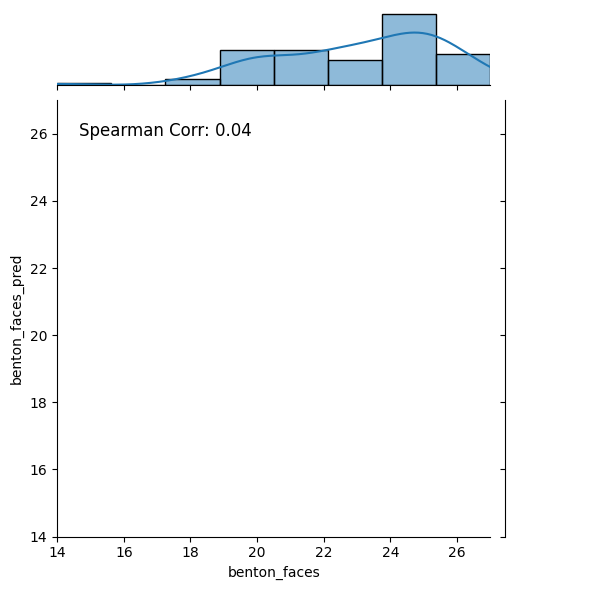

In [8]:
corr, _ = spearmanr(predictions["benton_faces"], predictions["benton_faces_pred"])

xmin = predictions["benton_faces"].min()
xmax = predictions["benton_faces"].max()
ymin = predictions["benton_faces_pred"].min()
ymax = predictions["benton_faces_pred"].max()

# Create the scatter plot
sns.jointplot(data=predictions, x="benton_faces",
              y="benton_faces_pred",
              kind="reg",
              line_kws={'color': 'red'},
              xlim=(xmin, xmax),
              ylim=(xmin, xmax)
)

# Annotate the plot with the Spearman correlation coefficient
plt.annotate(f'Spearman Corr: {corr:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', 
             ha='left', va='top', fontsize=12, color='black')

output_dir = 'viz_to_present/prediction_of_age_only'
os.makedirs(output_dir, exist_ok=True)  # Create directory if it doesn't exist
output_path = os.path.join(output_dir, 'correlation_age_prediction_train.png')  # Using SVG format as per your previous question
plt.savefig(output_path, format='png', bbox_inches='tight')

plt.show()

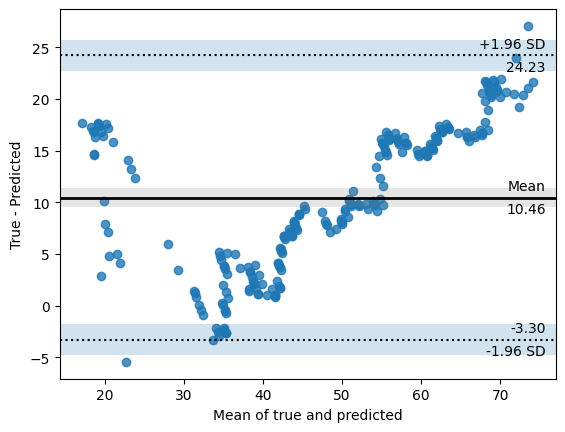

In [18]:
ax = pg.plot_blandaltman(predictions["age"], predictions["age_pred"])
ax.set_xlabel("Mean of true and predicted")
ax.set_ylabel("True - Predicted")
output_dir = 'viz_to_present/prediction_of_age_only'
os.makedirs(output_dir, exist_ok=True)  # Create directory if it doesn't exist
output_path = os.path.join(output_dir, 'residuals_age_prediction_train.png')  # Using SVG format as per your previous question
plt.savefig(output_path, format='png', bbox_inches='tight')


## Embeddings

In [4]:
embeddings = np.load(f"{exp_dir}/embeddings/joint_embeddings_run0_{dataset}.npy")

In [5]:
embeddings

array([[ 0.11821395,  0.81454206, -0.567932  ],
       [ 0.12497953,  0.74265385, -0.6579098 ],
       [ 0.40329364,  0.86242455, -0.30590537],
       [ 0.4192796 ,  0.87878555, -0.2279049 ],
       [ 0.32552785,  0.9056118 , -0.27184337],
       [ 0.1384861 ,  0.8152321 , -0.5623329 ],
       [ 0.3810536 ,  0.87435496, -0.3005022 ],
       [ 0.32554236,  0.8318157 , -0.44956058],
       [ 0.30169335,  0.8926642 , -0.3348611 ],
       [ 0.35525528,  0.87784076, -0.32123086],
       [ 0.37616867,  0.8791559 , -0.2925441 ],
       [ 0.19756944,  0.67198235, -0.7137269 ],
       [ 0.4606717 ,  0.82990545, -0.31470388],
       [ 0.13844311,  0.7423626 , -0.65553886],
       [ 0.06643566,  0.8011871 , -0.59471464],
       [ 0.30936465,  0.91527903, -0.25798807],
       [ 0.35346055,  0.8693223 , -0.34546253],
       [ 0.1889105 ,  0.87690645, -0.4419819 ],
       [ 0.18900113,  0.90069133, -0.39119518],
       [ 0.03389675,  0.73262864, -0.67978394],
       [ 0.28110808,  0.9057807 , -0.317

In [6]:
idx = np.load("/data/parietal/store2/work/mrenaudi/contrastive-reg-3/results/test on mat ae pretrained for embedding analysis/recon_mat/test_idx_run0.npy")

In [7]:
idx

array([228, 116,  55, 155, 110, 126,  39,  63, 240,  75,  76, 209, 224,
       185, 118,  42, 299,  78, 317, 119, 234,  57, 196,  90, 288,  25,
       256,   9,  94,  93, 350, 153, 210,  22, 113, 245,  56, 152,  30,
        45, 101, 114, 278, 137,   5, 219, 341, 339, 202, 167, 325, 158,
         3, 109,  72, 307, 343,  46, 314,  73, 223, 165,  33, 310, 248,
        77, 157, 182, 147, 265, 328, 179, 340,  82,  16,  66, 132,   7,
       296, 108, 312, 335,  84, 287, 277, 303,  60, 203, 249, 326, 211,
       261,  17, 239,  24, 309, 290, 180, 250, 347, 198, 124, 295, 291,
       222,  19])

In [8]:
embeddings = pd.DataFrame(embeddings, columns = ["Dim 1", "Dim 2",  "Dim 3"])
embeddings["Age"] = predictions["age"].values
embeddings["Age Pred"] = predictions["age_pred"].values

In [9]:
embeddings_array = embeddings[["Dim 1", "Dim 2", "Dim 3"]].values

In [33]:
import kaleido

fig = px.scatter_3d(embeddings, x='Dim 1', y='Dim 2', z='Dim 3',
                    color_continuous_scale=["blue", "green", "red"],
              color='Age') #range_color=[50, 180],
# fig.update_traces(marker=dict(size=4))
fig.update_layout(
    width=800,  # Adjust width as needed
    height=800,  # Adjust height as needed
    scene=dict(
        xaxis=dict(gridcolor='grey', backgroundcolor='white'),
        yaxis=dict(gridcolor='grey', backgroundcolor='white'),
        zaxis=dict(gridcolor='grey', backgroundcolor='white'),
        bgcolor='white'
    ),
    paper_bgcolor='white',
    plot_bgcolor='white',
    title = 'embedding space of train samples, colors with respect to true age'
)
fig.write_image("viz_to_present/prediction_of_age_only/embedding_test_true_age.svg", format='svg')
fig.show()


In [12]:
fig = px.scatter_3d(embeddings, x='Dim 1', y='Dim 2', z='Dim 3',
                    color_continuous_scale=["blue", "green", "red"],
              color='Age Pred') #range_color=[50, 180],
# fig.update_traces(marker=dict(size=4))
fig.update_layout(
    width=800,  # Adjust width as needed
    height=800,  # Adjust height as needed
    scene=dict(
        xaxis=dict(gridcolor='grey', backgroundcolor='white'),
        yaxis=dict(gridcolor='grey', backgroundcolor='white'),
        zaxis=dict(gridcolor='grey', backgroundcolor='white'),
        bgcolor='white'
    ),
    paper_bgcolor='white',
    plot_bgcolor='white'
)
#fig.write_image("embedding.svg", format='svg')
fig.show()

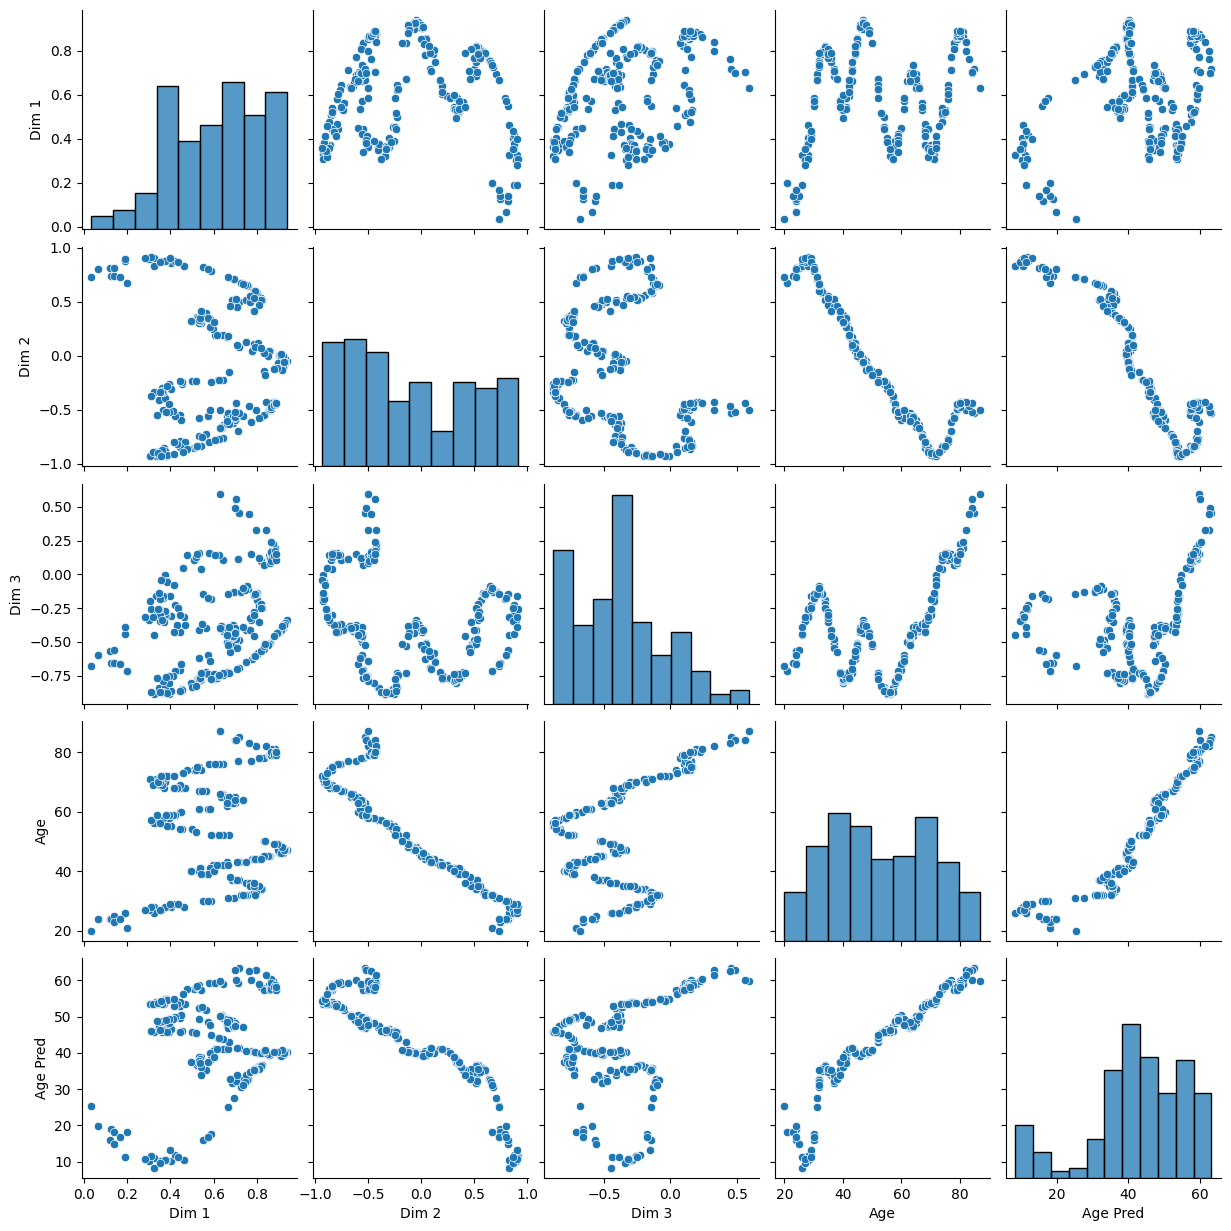

In [39]:
sns.pairplot(embeddings)

output_dir = 'viz_to_present/prediction_of_age_only'
os.makedirs(output_dir, exist_ok=True)  # Create directory if it doesn't exist
output_path = os.path.join(output_dir, 'pairplots_age_prediction_train.png')  # Using SVG format as per your previous question
plt.savefig(output_path, format='png', bbox_inches='tight')

In [42]:
import os
import zipfile

# Define the folder path and the output zip file path
folder_path = '/data/parietal/store2/work/mrenaudi/contrastive-reg-3/results/test on mat ae pretrained for embedding analysis'
output_zip_path = os.path.join(os.path.dirname(folder_path), 'embedding_analysis_results.zip')

# Create a ZipFile object in write mode
with zipfile.ZipFile(output_zip_path, 'w') as zip_file:
    # Walk through the directory and add files to the zip
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            file_path = os.path.join(root, file)
            relative_path = os.path.relpath(file_path, start=os.path.dirname(folder_path))
            zip_file.write(file_path, relative_path)
            print(f"Added {relative_path} to the zip archive")

print(f"Zip archive created successfully at: {output_zip_path}")

Added test on mat ae pretrained for embedding analysis/pred_results.csv to the zip archive
Added test on mat ae pretrained for embedding analysis/mape.csv to the zip archive
Added test on mat ae pretrained for embedding analysis/recon_mat/test_idx_run0.npy to the zip archive
Added test on mat ae pretrained for embedding analysis/recon_mat/recon_mat_run0.npy to the zip archive
Added test on mat ae pretrained for embedding analysis/recon_mat/mape_mat_run0.npy to the zip archive
Added test on mat ae pretrained for embedding analysis/embeddings/mat_embeddings_run0_train.npy to the zip archive
Added test on mat ae pretrained for embedding analysis/embeddings/joint_embeddings_run0_train.npy to the zip archive
Added test on mat ae pretrained for embedding analysis/embeddings/mat_embeddings_run0_test.npy to the zip archive
Added test on mat ae pretrained for embedding analysis/embeddings/joint_embeddings_run0_test.npy to the zip archive
Added test on mat ae pretrained for embedding analysis/sa

In [41]:
import zipfile
zip_output_path = 'plots_exp.zip'
output_dir = '/data/parietal/store2/work/mrenaudi/contrastive-reg-3/results/test on mat ae pretrained for embedding analysis'
with zipfile.ZipFile(zip_output_path, 'w') as zip_file:
    for filename in os.listdir(output_dir):
        file_path = os.path.join(output_dir, filename)
        zip_file.write(file_path, filename)
        os.remove(file_path)

IsADirectoryError: [Errno 21] Is a directory: '/data/parietal/store2/work/mrenaudi/contrastive-reg-3/results/test on mat ae pretrained for embedding analysis/recon_mat'

In [40]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=50, radius=1, algorithm='brute', metric = 'cosine', p = 1).fit(embeddings_array)
distances, neighbors = neigh.kneighbors(embeddings_array, return_distance = True)

In [41]:
neighborhood = embeddings.loc[neighbors[0]]
neighborhood["Distance"] = distances[0]

In [43]:
neighborhood

,Dim 1,Dim 2,Dim 3,Age,Age Pred,Distance
0,0.889134,-0.445998,0.102599,24.0,17.850168,0.000000
21,0.894065,-0.433566,0.112550,24.0,18.515646,0.000139
14,0.897773,-0.428716,0.101028,24.0,19.096056,0.000188
1,0.903127,-0.423260,0.072202,24.0,20.085260,0.000818
13,0.926937,-0.367765,0.074415,23.0,23.978592,0.004172
5,0.829810,-0.551143,0.087497,25.0,12.582992,0.007402
11,0.917575,-0.395186,-0.043408,21.0,24.057005,0.012354
19,0.872372,-0.481681,-0.083372,20.0,18.752607,0.018070
17,0.766516,-0.627047,0.138800,26.0,12.191025,0.024562
7,0.769656,-0.594917,0.231739,26.0,13.060964,0.026565


In [51]:
mape = pd.read_csv("/data/parietal/store2/work/mrenaudi/contrastive-reg-3/results/test on mat ae pretrained for embedding analysis with slight change in direction reg/mape.csv")

In [52]:
mape

,train_ratio,model_run,dataset,age
0,1.0,0,test,0.272827
1,1.0,0,train,0.209919


In [10]:
from nearest_neighbor import nn

nn(exp_name, dataset, 10)

100%|██████████| 246/246 [00:04<00:00, 51.51it/s]


In [11]:
neigh_conn_var_ddist = np.load(f'{exp_dir}/embeddings/neigh_conn_var_ddist_mean{dataset}.npy')

FileNotFoundError: [Errno 2] No such file or directory: './results/test on mat ae pretrained for embedding analysis/embeddings/neigh_conn_var_ddist_meantrain.npy'

In [12]:
neigh_dist = np.load("/data/parietal/store2/work/mrenaudi/contrastive-reg-3/results/test on mat ae pretrained for embedding analysis/embeddings/neigh_conn_dvar_ddist_mean_train.npy")

In [13]:
neigh_dist

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [14]:
neigh_var = np.load("/data/parietal/store2/work/mrenaudi/contrastive-reg-3/results/test on mat ae pretrained for embedding analysis/embeddings/neigh_conn_var_train.npy")

In [15]:
neigh_var

array([[[0.        , 0.04053221, 0.04427461, ..., 0.02934115,
         0.01976823, 0.02980244],
        [0.04053221, 0.        , 0.03764337, ..., 0.04981095,
         0.03340898, 0.01994169],
        [0.04427461, 0.03764337, 0.        , ..., 0.0482802 ,
         0.01927197, 0.02308794],
        ...,
        [0.02934115, 0.04981095, 0.0482802 , ..., 0.        ,
         0.02466778, 0.02837709],
        [0.01976823, 0.03340898, 0.01927197, ..., 0.02466778,
         0.        , 0.01687435],
        [0.02980244, 0.01994169, 0.02308794, ..., 0.02837709,
         0.01687435, 0.        ]],

       [[0.        , 0.03250487, 0.04361554, ..., 0.02588849,
         0.0165376 , 0.02272109],
        [0.03250487, 0.        , 0.03146874, ..., 0.04627553,
         0.03475896, 0.01956063],
        [0.04361554, 0.03146874, 0.        , ..., 0.04629829,
         0.01896812, 0.0213715 ],
        ...,
        [0.02588849, 0.04627553, 0.04629829, ..., 0.        ,
         0.0242487 , 0.02309618],
        [0.0